1. Import the Yahoo Finance Python package by running import yfinance as yf

In [162]:
# TASK 1: 
#importing necessary libraries 
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [164]:
import yfinance as yf

In [166]:
# package not installed, downloading it manually 
!pip install yfinance

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels


2. Create a list named tickers, consisting of the following stock tickers: META, AAPL, GOOG, NFLX

In [167]:
# TASK 2: 
#creating a list of stock tickers -> список, в котором хранятся биржевые символы в виде строк
tickers = ['META', 'AAPL', 'GOOG', 'NFLX']
tickers

['META', 'AAPL', 'GOOG', 'NFLX']

3. Create a dictionary named data_dict that will contain stock tickers from the list
defined in Step 2 as keys, and the last six months of price history for the respective
stocks as values. Hint: use for-loops and the following command to retrieve stock
price history: yf.Ticker(<your_ticker_here>).history(period='6mo')

In [170]:
# TASK 3: 
#creating a dictionary to store six months of price history for each ticker
data_dict = {}

for ticker in tickers:
    stock_data = yf.Ticker(ticker).history(period='6mo')
    
    # Добавление данных в словарь с тикером в качестве ключа
    data_dict[ticker] = stock_data
data_dict

{'META':                                  Open        High         Low       Close  \
 Date                                                                        
 2024-05-08 00:00:00-04:00  462.598929  474.655431  462.099901  471.681244   
 2024-05-09 00:00:00-04:00  469.086312  475.154479  466.720924  474.495789   
 2024-05-10 00:00:00-04:00  476.162515  476.571722  468.687086  475.274261   
 2024-05-13 00:00:00-04:00  471.830965  472.429804  461.950217  467.100189   
 2024-05-14 00:00:00-04:00  462.469213  471.621400  459.185600  470.932739   
 ...                               ...         ...         ...         ...   
 2024-11-01 00:00:00-04:00  567.609985  573.669983  562.559998  567.159973   
 2024-11-04 00:00:00-05:00  564.099976  568.690002  557.890015  560.679993   
 2024-11-05 00:00:00-05:00  567.299988  573.479980  566.669983  572.429993   
 2024-11-06 00:00:00-05:00  562.750000  573.000000  555.169983  572.049988   
 2024-11-07 00:00:00-05:00  576.890015  594.799988  575.

4. Print the resulting pandas dataframe for META in a separate Jupyter cell

In [172]:
# TASK 4
print(data_dict['META'])

                                 Open        High         Low       Close  \
Date                                                                        
2024-05-08 00:00:00-04:00  462.598929  474.655431  462.099901  471.681244   
2024-05-09 00:00:00-04:00  469.086312  475.154479  466.720924  474.495789   
2024-05-10 00:00:00-04:00  476.162515  476.571722  468.687086  475.274261   
2024-05-13 00:00:00-04:00  471.830965  472.429804  461.950217  467.100189   
2024-05-14 00:00:00-04:00  462.469213  471.621400  459.185600  470.932739   
...                               ...         ...         ...         ...   
2024-11-01 00:00:00-04:00  567.609985  573.669983  562.559998  567.159973   
2024-11-04 00:00:00-05:00  564.099976  568.690002  557.890015  560.679993   
2024-11-05 00:00:00-05:00  567.299988  573.479980  566.669983  572.429993   
2024-11-06 00:00:00-05:00  562.750000  573.000000  555.169983  572.049988   
2024-11-07 00:00:00-05:00  576.890015  594.799988  575.210022  591.700012   

5. For each stock ticker within the dictionary, remove all columns except for Close. Besides, use the pandas reset_index() method so that Date becomes your dataframe column, rather than your dataframe index.

In [174]:
# TASK 5: 
#keeping only 'Close' column and resetting the index for each ticker's data frame
for ticker in data_dict:
    data_dict[ticker] = data_dict[ticker][['Close']] # selecting only the 'Close' column
    # Reset the index so that 'Date' becomes a column
    data_dict[ticker] = data_dict[ticker].reset_index()
print(data_dict)

{'META':                          Date       Close
0   2024-05-08 00:00:00-04:00  471.681244
1   2024-05-09 00:00:00-04:00  474.495789
2   2024-05-10 00:00:00-04:00  475.274261
3   2024-05-13 00:00:00-04:00  467.100189
4   2024-05-14 00:00:00-04:00  470.932739
..                        ...         ...
123 2024-11-01 00:00:00-04:00  567.159973
124 2024-11-04 00:00:00-05:00  560.679993
125 2024-11-05 00:00:00-05:00  572.429993
126 2024-11-06 00:00:00-05:00  572.049988
127 2024-11-07 00:00:00-05:00  591.700012

[128 rows x 2 columns], 'AAPL':                          Date       Close
0   2024-05-08 00:00:00-04:00  182.281494
1   2024-05-09 00:00:00-04:00  184.106903
2   2024-05-10 00:00:00-04:00  182.838364
3   2024-05-13 00:00:00-04:00  186.064636
4   2024-05-14 00:00:00-04:00  187.213303
..                        ...         ...
123 2024-11-01 00:00:00-04:00  222.910004
124 2024-11-04 00:00:00-05:00  222.009995
125 2024-11-05 00:00:00-05:00  223.449997
126 2024-11-06 00:00:00-05:00  222

6. Within a for-loop, convert the values inside the Date column of each dataframe to
strings and remove the timestamps (i.e. convert e.g. “2024-08-29 00:00:00-04:00” to
“2024-08-29”) using the following command:
data_dict[<your_ticker_here>]['Date'] = data_dict
[<your_ticker_here>]['Date'].astype(str).apply(lambda x: x.split(' ')[0])

In [176]:
# TASK 6: 
#converting 'Date' column to strings and remove timestamps
for ticker in data_dict:
    # converting Date to string and remove the time portion
    data_dict[ticker]['Date'] = data_dict[ticker]['Date'].astype(str).apply(lambda x: x.split(' ')[0])

# аккуратный формат данных
for ticker in data_dict:
    print(f"Data for {ticker}:")
    print(data_dict[ticker].head()) 
    print("\n" + "="*40 + "\n")  # разделитель для удобства

Data for META:
         Date       Close
0  2024-05-08  471.681244
1  2024-05-09  474.495789
2  2024-05-10  475.274261
3  2024-05-13  467.100189
4  2024-05-14  470.932739


Data for AAPL:
         Date       Close
0  2024-05-08  182.281494
1  2024-05-09  184.106903
2  2024-05-10  182.838364
3  2024-05-13  186.064636
4  2024-05-14  187.213303


Data for GOOG:
         Date       Close
0  2024-05-08  170.740692
1  2024-05-09  171.159668
2  2024-05-10  169.872818
3  2024-05-13  170.481323
4  2024-05-14  171.508804


Data for NFLX:
         Date       Close
0  2024-05-08  609.469971
1  2024-05-09  612.090027
2  2024-05-10  610.869995
3  2024-05-13  616.590027
4  2024-05-14  613.659973




7. Again within a for-loop, for each dataframe in data_dict, set Date column as index
and drop the old index

In [178]:
# TASK 7: 
#checking whether "Date" is already the index for each data frame in data_dict
for ticker in data_dict:
    print(f"Data for {ticker}:\n")
    print(data_dict[ticker].head())  # Show the first few rows of the data frame
    print("\nIndex:", data_dict[ticker].index.name)  # Show the name of the index
    print("\n" + "="*40 + "\n")

Data for META:

         Date       Close
0  2024-05-08  471.681244
1  2024-05-09  474.495789
2  2024-05-10  475.274261
3  2024-05-13  467.100189
4  2024-05-14  470.932739

Index: None


Data for AAPL:

         Date       Close
0  2024-05-08  182.281494
1  2024-05-09  184.106903
2  2024-05-10  182.838364
3  2024-05-13  186.064636
4  2024-05-14  187.213303

Index: None


Data for GOOG:

         Date       Close
0  2024-05-08  170.740692
1  2024-05-09  171.159668
2  2024-05-10  169.872818
3  2024-05-13  170.481323
4  2024-05-14  171.508804

Index: None


Data for NFLX:

         Date       Close
0  2024-05-08  609.469971
1  2024-05-09  612.090027
2  2024-05-10  610.869995
3  2024-05-13  616.590027
4  2024-05-14  613.659973

Index: None




From the output, it is visible that "Date" was not the index (it displayed Index: None)

In [190]:
# attempted to set "Date" as the index for each data frame, using a try-except block to handle any errors if "Date" was missing.
for ticker in data_dict:
    try:
        # Attempt to set 'Date' as the index
        data_dict[ticker].set_index('Date', inplace=True)
    except KeyError:
        # If 'Date' is not a column, print a message
        print(f"'Date' column not found in {ticker} - it may already be set as an index or is missing.")

In [194]:
#checking each data frame in data_dict to ensure "Date" is now set as the index.
for ticker in data_dict:
    print(f"Data for {ticker}:\n")
    print(data_dict[ticker].head())  # showing the first few rows for each ticker's data
    print("\nIndex:", data_dict[ticker].index.name)  # showing the name of the index
    print("\n" + "="*40 + "\n")

Data for META:

                 Close
Date                  
2024-05-08  471.681244
2024-05-09  474.495789
2024-05-10  475.274261
2024-05-13  467.100189
2024-05-14  470.932739

Index: Date


Data for AAPL:

                 Close
Date                  
2024-05-08  182.281494
2024-05-09  184.106903
2024-05-10  182.838364
2024-05-13  186.064636
2024-05-14  187.213303

Index: Date


Data for GOOG:

                 Close
Date                  
2024-05-08  170.740692
2024-05-09  171.159668
2024-05-10  169.872818
2024-05-13  170.481323
2024-05-14  171.508804

Index: Date


Data for NFLX:

                 Close
Date                  
2024-05-08  609.469971
2024-05-09  612.090027
2024-05-10  610.869995
2024-05-13  616.590027
2024-05-14  613.659973

Index: Date




8. Print the dictionary value corresponding to the META key in a separate cell. Make
sure the value is a pandas dataframe.

In [196]:
# TASK 8
print(data_dict['META'])

                 Close
Date                  
2024-05-08  471.681244
2024-05-09  474.495789
2024-05-10  475.274261
2024-05-13  467.100189
2024-05-14  470.932739
...                ...
2024-11-01  567.159973
2024-11-04  560.679993
2024-11-05  572.429993
2024-11-06  572.049988
2024-11-07  591.700012

[128 rows x 1 columns]


9. Create a new dictionary called ret_dict. Use the closing prices from data_dict to calculate log-returns for each stock:
𝑟_𝑡 = log(𝑝𝑟𝑖𝑐𝑒_𝑡/𝑝𝑟𝑖𝑐𝑒_𝑡−1). Use natural logarithms. Similar to data_dict, use stock tickers as ret_dict keys and dataframes with log-returns as values. 

In [243]:
# TASK 9: 
import numpy as np

# ret_dict as an empty dictionary
ret_dict = {}

for ticker in data_dict:
    # calculate the log-returns using the 'Close' prices from data_dict
    log_returns = np.log(data_dict[ticker]['Close'] / data_dict[ticker]['Close'].shift(1))
    
    # dropping any NA values generated due to the shift operation
    log_returns = log_returns.dropna()
    
    # store the log-returns in ret_dict as a new DataFrame
    ret_dict[ticker] = pd.DataFrame(log_returns, columns=['Close'])
print(ret_dict)

{'META':                Close
Date                
2024-05-09  0.005949
2024-05-10  0.001639
2024-05-13 -0.017348
2024-05-14  0.008172
2024-05-15  0.020328
2024-05-16 -0.017408
2024-05-17 -0.002793
2024-05-20 -0.006527
2024-05-21 -0.009020
2024-05-22  0.006757
2024-05-23 -0.004285
2024-05-24  0.026357
2024-05-28  0.003549
2024-05-29 -0.011653
2024-05-30 -0.015530
2024-05-31 -0.000471
2024-06-03  0.022578
2024-06-04 -0.001048
2024-06-05  0.037183
2024-06-06 -0.002629
2024-06-07 -0.001622
2024-06-10  0.019367
2024-06-11  0.009643
2024-06-12  0.002696
2024-06-13 -0.009359
2024-06-14  0.001111
2024-06-17  0.004887
2024-06-18 -0.014193
2024-06-20  0.004415
2024-06-21 -0.013889
2024-06-24  0.008313
2024-06-25  0.023161
2024-06-26  0.004923
2024-06-27  0.012473
2024-06-28 -0.029970
2024-07-01  0.000912
2024-07-02  0.009505
2024-07-03  0.000902
2024-07-05  0.057070
2024-07-08 -0.019809
2024-07-09  0.001284
2024-07-10  0.008810
2024-07-11 -0.041996
2024-07-12 -0.027345
2024-07-15 -0.005447
2024

10. For all dataframes in ret_dict, rename the close column. Use respective stock tickers as column names (i.e. for ret_dict[‘META’], the Close column is to be renamed to  META and so on). 

In [253]:
#TASK 10:
for ticker in ret_dict:
    ret_dict[ticker].columns = [ticker]  # renaming the column to the ticker name
    
for ticker in ret_dict:
    print(ret_dict[ticker].head())  # display the first few rows of each ticker's log-returns
    print("\n" + "="*40 + "\n")  

                META
Date                
2024-05-09  0.005949
2024-05-10  0.001639
2024-05-13 -0.017348
2024-05-14  0.008172
2024-05-15  0.020328


                AAPL
Date                
2024-05-09  0.009964
2024-05-10 -0.006914
2024-05-13  0.017492
2024-05-14  0.006155
2024-05-15  0.012144


                GOOG
Date                
2024-05-09  0.002451
2024-05-10 -0.007547
2024-05-13  0.003576
2024-05-14  0.006009
2024-05-15  0.011278


                NFLX
Date                
2024-05-09  0.004290
2024-05-10 -0.001995
2024-05-13  0.009320
2024-05-14 -0.004763
2024-05-15 -0.000228




11. Merge all log-returns from ret_dict into a single pandas dataframe named df_out. Hint: this is trickier than the previous steps and requires some Python experience.
Hence, sample code that can be copy-pasted to your Jupyter notebook and ran to complete this step can be found on the next page. Try your best to solve this on your own, check StackOverflow for hints, and use the sample code if you get stuck.

In [256]:
# TASK 11: Merge all log-returns dataframes into a single dataframe named df_out
df_out = pd.DataFrame()

for number, ticker in enumerate(tickers):
    if number == 0:
        # Initialize df_out with the first ticker's log-returns dataframe
        df_out = ret_dict[ticker]
    else:
        # Merge subsequent ticker dataframes into df_out on the date index
        df_out = pd.merge(df_out, ret_dict[ticker], how='outer', left_index=True, right_index=True)
print(df_out.head())

                META      AAPL      GOOG      NFLX
Date                                              
2024-05-09  0.005949  0.009964  0.002451  0.004290
2024-05-10  0.001639 -0.006914 -0.007547 -0.001995
2024-05-13 -0.017348  0.017492  0.003576  0.009320
2024-05-14  0.008172  0.006155  0.006009 -0.004763
2024-05-15  0.020328  0.012144  0.011278 -0.000228


12. Plot the four returns series in a single matplotlib plot

In [288]:
# TASK 12: 
#converting the data frame into DatetimeIndex to ensure it represents the time range based on most recent dates 
df_out.index = pd.to_datetime(df_out.index)

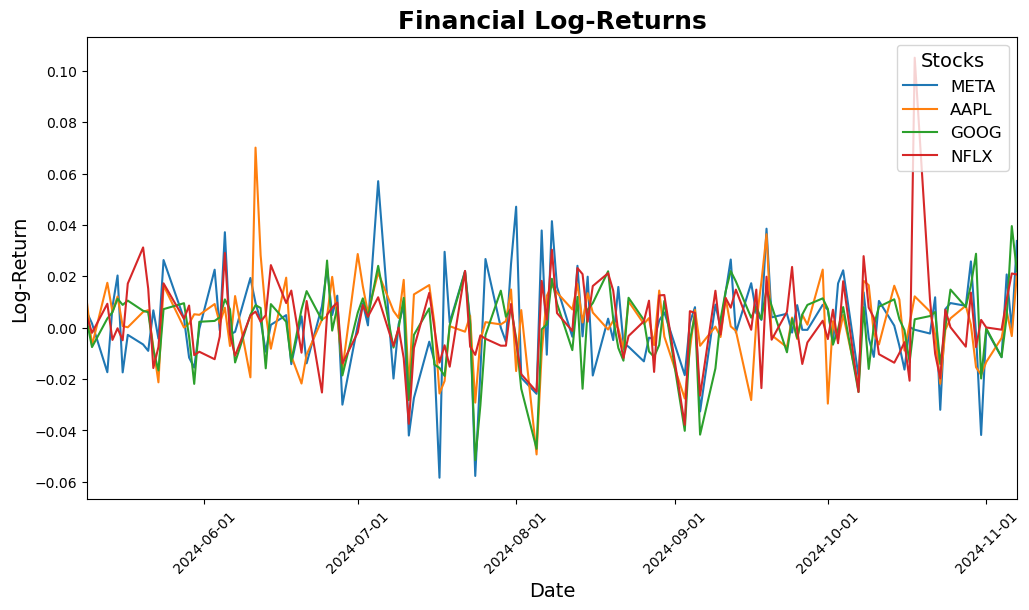

In [300]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# setting up the plot size
plt.figure(figsize=(12, 6))

# plotting each stock's log-returns from df_out with its respective color
for ticker in df_out.columns:
    plt.plot(df_out.index, df_out[ticker], label=ticker)

plt.title("Financial Log-Returns", fontsize=18, fontweight='bold', color='#000000')
plt.xlabel("Date", fontsize=14, color='#000000')
plt.ylabel("Log-Return", fontsize=14, color='#000000')

# Format the x-axis to show only the first day of each month
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  #основные тики установлены на начало каждого месяца
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  

plt.xlim(df_out.index.min(), df_out.index.max())
plt.xticks(rotation=45)

# Легенда
plt.legend(title="Stocks", fontsize=12, title_fontsize=14, loc='upper right', fancybox=True, framealpha=0.8)

# Show the plot
plt.show()